# System resilience

*What distinguishes biological systems from physical ones? - Biological systems perform computations.*

In this chapter, you will learn:
- A step-by-step brief introduction to the theory of dynamical systems from one-dimensional to multidimensional;
- Concepts of network, bifurcation, criticality, resilience, and stability will find a mathematical embodiment;
- Build a simple dummy dynamical model of biological age;
- Build a resilience indicator from real data;
- Develop a complex system intuition and understand how they can be described with universal laws.

```{contents}
```

## Recap differential equations

The differential equation is a very useful instrument for understanding and modeling real biological processes. Once you develop a basic intuition of the differential equation you will see the world as a set of dynamic systems. What is a dynamic system? Well, everything! Everything that we may observe evolving in time could be (and possibly must be) described with this instrument.

In general, a differential equation is written as

$$
  \dot{x} = f(x, t)
$$ (diff_eq)

where f(x, t) - given function of time $t$ and state variable $x$ itself. Note, that $x=x(t)$ is also a function of time, hence, $\dot{x} = dx(t)/dt = dx/dt$ - we omit $(t)$ for simplicity. A huge body of knowledge of differential equations theory has been elaborated for ages. In this tutorial, we only touch on the most important topics needed for understanding complex systems resilience introduced in the previous chapter.

### Linear ordinary differential equations

First, let's start with the simplest cases of so-called growth/death models. Let:

$$ 
    \dot{x} = a 
$$

where $a$ is a constant;

$$ 
    \frac{dx}{dt} = a 
$$
$$ 
    dx = a\cdot dt 
$$

integrate both sides,

$$ 
    \int dx = a \int dt 
$$
$$
    x(t) = at + C
$$ (ex_sol_1)

where constant $C$ is defined from initial conditions. This is the simplest case of a separable equation (s.t. you can separate variable $x$ from $t$ on both sides) that describes **linear growth** of $x$. For example, the amount of water accumulated in a water tank fed by a pipe. The next case:

$$ 
    \dot{x} = ax 
$$
$$ 
    \int \frac{dx}{x} = a\int dt 
$$
$$ 
    \ln(x(t)) = at + C
$$
$$ 
    x(t) = e^Ce^{at} = C_1e^{at}
$$ (ex_sol_2)

This equation describes the dynamics of so-called **exponential growth/death** depending on the sign of the coefficient $a$. One common example of a system described by this equation is the number of bacteria in a petri dish in the case when resources for growth are unlimited. Indeed, you know that number of bacteria the next day depends on the number of bacteria on the previous day. Thus, the differential equation has the form $\dot{x} = ax$ and has a solution in a form of exponential growth.

Let's draw the solutions {eq}`ex_sol_1`, {eq}`ex_sol_2`.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = '16' # increase font size

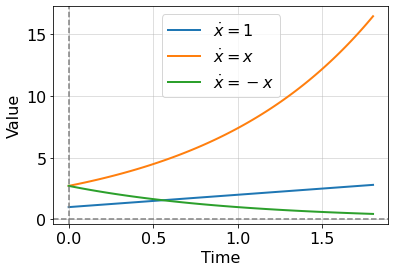

In [2]:
x1 = lambda t, a, C: a*t + C
x2 = lambda t, a, C: np.exp(a*t) * np.exp(C)

t = np.linspace(0, 1.8, 100)
C = 1

fig, ax = plt.subplots(1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.plot(t, x1(t, 1, C), label='$\dot{x} = 1$', lw=2);
ax.plot(t, x2(t, 1, C), label='$\dot{x} = x$', lw=2);
ax.plot(t, x2(t, -1, C), label='$\dot{x} = -x$', lw=2);
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend();

Two important observations: (1) the solution of equation {eq}`ex_sol_1` always diverges, i.e there is no non-zero constant $Const$ such that $x(\infty) \to Const$; (2) the solution of equation {eq}`ex_sol_2` has three regimes: one at positive constant $a$ - divergence (exponential growth), one at negative $a$ - convergence to zero (exponential decay), and one at $a=0$ - trivial case with no dynamics. Adjusting constant $a$ continuously leads to switching between regimes which is something that we call **bifurcation** and will study further. In other words. they say a system undergoes a bifurcation as $a$ approaches zero (from the left or right side). Of course, in this case, the system changes its behavior **qualitatively**.

### Non-linear ordinary differential equations

Linear differential equations and systems of them provide a lot of possibilities for modeling technical and living systems. However, already in the case of bacteria growth modeling with limited resources, we force the need to use quadratic models. This is where the logistic model appears:

$$ 
    \dot{x} = rx(1 - \frac{x}{K}) 
$$

here we introduced two additional parameters: $r$ - growth rate, and $K$ - carrying capacity. To understand this equation deeper let's rewrite it in expanded form:

$$ 
    \dot{x} = rx - \frac{rx^2}{K} =  rx - \delta x^2
$$

The first term is a growth term responsible for the increase of the number of bacteria with the rate $r$. The second term is more tricky and suddenly quadratic with a new parameter $\delta = r/K$ which is interpreted as the death rate. The idea of the second term is that after $x$ becomes quite a large number the growth must rapidly slow down modeling, thus, a deficit of resources. A good idea to use a quadratic term for that which increases faster than linear and is not so hard to compute. But the right question here is: "why not cubic or exponent or something else?". It turns out that the quadratic term is a good approximation of the behavior of real-world cases of growth. One additional intuition behind the quadratic term is that it reflects pairwise interactions of $x$ species, which can we may interpret as a competition for resources (aka crowding pressure).

Let's solve it:

$$ 
    \frac{dx}{dt} = rx(1 - \frac{x}{K}) 
$$
$$ 
    \frac{dx}{x(1 - \frac{x}{K}) } = rdt
$$

split the left part by the sum of fractions with some unknown (yet) coefficients $A$ and $B$:

$$ 
    \frac{Adx}{x} + \frac{Bdx}{(1 - \frac{x}{K}) } = rdt
$$

consider the following equation for the nominator:

$$ 
    A(1 - \frac{x}{K})dx + Bxdx = dx
$$
$$ 
    A(1 - \frac{x}{K}) + Bx = 1
$$
$$ 
    A - A\frac{x}{K} + Bx = 1
$$
$$ 
    A - x(\frac{A}{K} + B) = 1
$$

from the obtained equation we can compose the following system:

$$
\begin{cases}
    -\frac{A}{K} + B = 0 \rightarrow B = \frac{A}{K}\\
    A = 1\\
\end{cases}
$$

Thus, we have

$$ 
    \frac{dx}{x} + \frac{\frac{1}{K}dx}{(1 - \frac{x}{K}) } = rdt
$$
$$ 
    \int\frac{dx}{x} + \frac{1}{K}\int\frac{dx}{(1 - \frac{x}{K}) } = \int rdt
$$
$$ 
    \ln(x) - \ln(1 - \frac{x}{K}) = rt + C
$$
$$ 
    \ln(\frac{x}{1 - \frac{x}{K}}) = rt + C
$$
$$ 
    \frac{x}{1 - \frac{x}{K}} = C_1e^{rt}
$$

It is easy to see that $C_1$ can be computed from initial value problem (at $t=0$) as following:

$$ 
    C_1 = \frac{x_0}{1 - \frac{x_0}{K}} = \frac{Kx_0}{K - x_0}
$$

where $x_0 = x(t=0)$ correspondingly. After expressing $x$ from the integral above have:

$$ 
    x(t) = \frac{K}{1 + \frac{K - x_0}{x_0}e^{-rt}}
$$ (ex_sol_3)

What regimes are possible for this solution? Let's suppose that carrying capacity $K=1$, initial population $x_0=0.5$ and explore graphically the dynamics at different $r$:

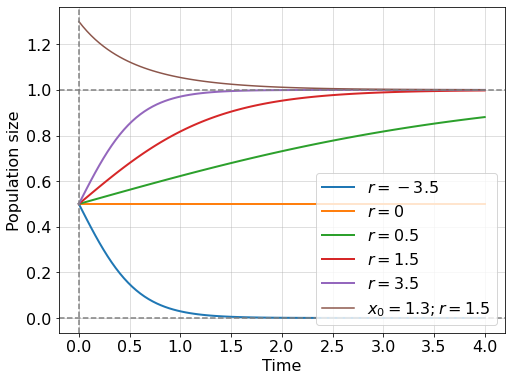

In [3]:
x3 = lambda t, K, r, x0: K / (1 + (K - x0) / x0 * np.exp(-r * t))

t = np.linspace(0, 4, 100)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Time')
ax.set_ylabel('Population size')
for r in [-3.5, 0, 0.5, 1.5, 3.5]:
    ax.plot(t, x3(t, 1, r, 0.5), label=f'$r = {r}$', lw=2);

ax.plot(t, x3(t, 1, 1.5, 1.3), label=f'$x_0 = 1.3; r = 1.5$'); # another initial condition
ax.axhline(0, color='grey', ls='--')
ax.axhline(1, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='lower right');

Excellent! We solved a new kind of dynamical system describing bacterial growth with limited resources. As before we observe three different regimes for $r>0$ - logistic growth; $r=0$ - no dynamics; $r<0$ - logistic decay (not exponential!). But we also see something new, our solutions for growth are bounded with carrying capacity $K=1$ and, for all initial conditions (even for larger than $K$), trajectories *attract* to a fixed value $K$ which is called an **attractor**. In the next chapter, we will discuss attractors in more detail, but before that, we need to learn what to do with non-integrable non-linear differential equations.

```{admonition} Exercise 1
:class: dropdown
What kind of growth exhibits equation $\dot{x} = a*x^2$? Solve the equation for positive $a$ and $x_0 > 0$. What wrong with this equation if we would try it for modeling real systems growth? What is the name of this model (try to google or chatGPT it)?
```


### Numerical integration

The class of integrable differential equations is very small, even so, they are extremely useful for describing complex systems dynamics. In some cases, however, you may develop a more sophisticated model of a process under study and the corresponding differential equation does not have a closed-form solution. What can we do in this case? Consider the following complication of the logistic model:

$$
    \dot{x} = r(t) (x  - \frac{x^2}{K(t)})  =  r_0 sin^2(t) (x  - \frac{x^2}{1 + \sqrt{t}})
$$ (eq_complex_logistic)

now our logistic model contains two additional assumptions: (i) the growth rate changes as a sinusoidal function of time $r = r(t) = r_0 sin^2(t)$ - it models a photo-sensitivity of bacteria allowing them to reproduce effectively in the day time with maximum growth rate or $r_0$; (ii) the carrying capacity slowly increases with time by square root law starting from 1, namely $K = K(t) = 1 + \sqrt{t}$. You can check that this new differential equation is non-integrable in elementary functions, so we need to obtain the solution **numerically**.

We introduce the **Forward-Euler** scheme of integration. without going into the details of the proof, forward Euler prescribes just to iteratively compute each next step as a sum of results from the previous step and the computed value of the function on the previous step. Let's rewrite our new logistic equation {eq}`eq_complex_logistic` in the general form:

$$
  \frac{dx}{dt} = f(x, t)
$$ 

rewrite the differetial equation in finite-difference form:

$$
  \frac{\Delta x}{\Delta t} = \frac{x_i - x_{i-1}}{\Delta t} = f(x_{i-1}, t_{i-1})
$$ 

expressing $x_i$ from the latter have:

$$
  x_i = x_{i-1} + f(x_{i-1}, t_{i-1})\Delta t 
$$ 

We did it! We have a clear iterative scheme for integrating our system. Let's code it, assuming that $x_0 = 0.5$:

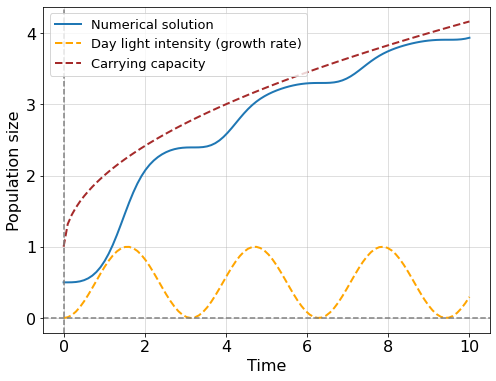

In [4]:
f = lambda x, t, r0: r0 * np.sin(t)**2 * (x - x**2 / (1 + np.sqrt(t)))

n = 100 # number of integration steps
t = np.linspace(0, 10, n)
dt = t[1] - t[0] #time difference
r0 = 3
x0 = 0.5
x = np.empty(n) #resulting integral
x[0] = x0 # assign initial condition

for i in range(1, n): #integrate from 1-st index
    x[i] = x[i-1] + f(x[i-1], t[i-1], r0) * dt

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Time')
ax.set_ylabel('Population size')
ax.plot(t, x, label=f'Numerical solution', lw=2);
ax.plot(t, np.sin(t)**2, label=f'Day light intensity (growth rate)', color='orange', ls='--', lw=2);
ax.plot(t, 1 + np.sqrt(t), label=f'Carrying capacity', color='brown', ls='--', lw=2);
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='upper left', fontsize=13);

First, it is beautiful, isn't it? We see that daytime affects an ability to grow and expanding carrying capacity determines the limits of this growth. This simple example helps us to understand the **top-down** modeling approach. This means that we do not know exactly the underlying microscopic biological mechanism inducing growth in the number of bacteria, rather we try to guess the function which can *describe* the observable behavior. This is something that is also known as the **phenomenological** model which tries to describe a phenomenon without explicitly pointing to its mechanism of it.

```{admonition} Note
:class: dropdown
Surely, forward Euler's method is not the best in terms of accuracy of approximation and speed of convergence (the famous Runge Kutta method can be much better). To dig into the plethora of algorithms for numerical integrations we recommend the following book {cite}`holmes2016introduction`
```


## Stability theory and bifurcations

(stability-intuition)=
### Stability intuition

Now we start to develop the core dynamical system property - its stability. It is a case when the mathematical framework has a strict everyday physical analogy. Let's discuss the picture below:

```{figure} figs/Potential.png
:name: potential
:width: 600
Example of potential landscape.
```

We see a ball in three positions. You can easily say which position is stable, unstable, or metastable. Indeed, the first position denoted $x^*_1$ - is a stable position. Mathematically speaking, the position of $x$ is called stable if after any arbitrarily small perturbation ($y$) the system returns the initial state $x^*_1$. The opposite case for $x^*_2$ where any small perturbation forces the system to leave the previous state. The third case $x^*_3$ is metastable (or marginally stable) that is this position is a midpoint between stable and unstable regimes of the system (remember equation {eq}`ex_sol_2` with $a=0$). This third case is also called **critical** and it is very important for our discussion of system **resilience**. One minor technical thing remained. We need to understand how to obtain this so-called **potential landscape** depicted at {numref}`potential`, i.e. some function whose maxima, minima and *saddles* (or flat valleys) describe the full set of fixed (or critical) points $\{x^* | \frac{dx}{dt}|_{x=x^*}=0\}$, and, what is more important, characterizes stability properties of these points.

Let's use an already familiar logistic model for all derivations.

$$ 
    \frac{dx}{dt} = rx(1 - \frac{x}{K}) = f_\theta(x)
$$

This model has two parameters $r$ and $K$ which we just gather in a set $\theta = \{r, K\}$ and will use subscript $\theta$ for the denotation pointing that our function $f_\theta$ contains these two parameters. By definition, a fixed point is a point where the derivative equals zero - where the dynamics "stops".

$$ 
    \frac{dx}{dt} = 0 \Leftrightarrow f_\theta(x) = rx(1 - \frac{x}{K}) = 0
$$

It is easy to see that a function $rx(1 - \frac{x}{K}) = 0$ has roots at points $x=0$ and $x = K$. As we discussed above, the point $x=K$ is an attractor but can we prove rigorously that it is also a stable point? And, what type of stability $x=0$ has? Consider the following equation perturbed around a fixed point:

$$ 
    \frac{d(x^* + y)}{dt} = f_\theta(x^* + y)
$$

expand the left term as the sum of derivatives:

$$ 
    \frac{dx^*}{dt} + \frac{dy}{dt} = f_\theta(x^* + y)
$$

by definition, $dx^*/dt$ = 0 so we have:

$$ 
    \frac{dy}{dt} = f_\theta(x^* + y)
$$

We are interested how function $f_\theta$ depends on a small perturbation $y$ around $x^*$, so let's expand it in a Taylor series around $x^*$:

$$ 
    \frac{dy}{dt} = f_\theta(x^*) + ((x^* + y) - x^*)\frac{df_\theta}{dx}\bigg|_{x=x^*} + \ldots
$$
$$ 
    \frac{dy}{dt} = f_\theta(x^*) + y\frac{df_\theta}{dx}\bigg|_{x=x^*} + \ldots
$$

Assuming that: (i) perturbation $y$ is infinitesimal, (ii) function $f_\theta$ is continuous and (at least) twice differentiable - it is enough to consider only linear terms in the Taylor expansion. Remember also that the constant term $f_\theta(x=x^*, y=0)=0$ by definition, finally have:

$$ 
    \frac{dy}{dt} \approx y\frac{df_\theta}{dx}\bigg|_{x=x^*}
$$

Historically, the partial derivative term is usually denoted as $\lambda_\theta$:

$$ 
    \frac{dy}{dt} \approx \lambda_\theta y
$$ (eq_pert)

We will refer to the obtained as a **perturbation equation**. A simple analysis is now applied to determine whether the perturbation grows or decays as time evolves (remember equation {eq}`ex_sol_2` with $\lambda_\theta$ instead of $a$). If $\lambda_\theta > 0$ the initially arbitrarily small perturbation grows in time and dynamics become unstable. On the other hand, if $\lambda_\theta < 0$ the perturbation decays in time and stable dynamics is observed. In the intermediate case, $\lambda_\theta = 0$ system is in a **critical state** and nothing can be said about system stability until the value of $\lambda_\theta$ changes.

Let's look how $\lambda_\theta$ depends on its parameters $\theta$:

$$
    \lambda_\theta = \frac{df_\theta}{dx}\bigg|_{x=x^*} = r - \frac{2r}{K}x^*
$$

one can see that for $x^*=K$ the system is stable while $r>0$ because $r - \frac{2r}{K}K = r - 2r = -r < 0$. The opposite works for $x^*=0$, then $r - \frac{2r}{K}0 = r > 0$ - the system is unstable (revise the plot in the non-linear system paragraph).


### Potential function

Once we studied a system's behavior around fixed points, we are ready to formulate a potential function definition. It is rather straightforward but let us step back and discuss what drives any dynamics system. It is a funny coincidence (or not?) that symbol of function $f$ is denoted with the letter "f" just like a physical force $F$. Indeed, any mechanistic dynamical system drives with some force $F$:

$$
    \frac{dx}{dt} = F
$$

we also know from the higher school physics course that force acts on a body moving in a potential field $V$, and the force equals the negative gradient of the field i.e.

$$
    \frac{dx}{dt} = F = -\frac{dV}{dx}
$$

Thus, remembering that in our problem $F = f_\theta$ have the following equation for the potential function:

$$
    V_\theta = -\int f_\theta dx
$$

substitution of the logistic function yields:

$$
    V_\theta(x) = -\int rx(1 - \frac{x}{K}) dx = r(\frac{x^3}{3K} - \frac{x^2}{2}) + V_0
$$

where $V_0$ is a constant which can be equal to zero (we do not bother with constant potential level, only differences and fixed points are interested in our discussion). 

Let's finally draw the potential landscape for the logistic growth model:


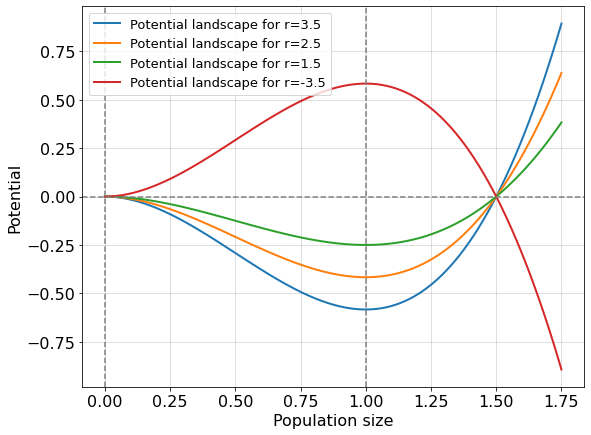

In [5]:
V = lambda x, r, K: r * (x**3 / (3 * K) - x**2 / 2)

x = np.linspace(0, 1.75, 100) #negative population size is non-physical
K = 1

fig, ax = plt.subplots(1, 1, figsize=(9,7))
ax.set_xlabel('Population size')
ax.set_ylabel('Potential')
for r in [3.5, 2.5, 1.5, -3.5]:
    ax.plot(x, V(x, r, K), label=f'Potential landscape for r={r}', lw=2);
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.axvline(1, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='upper left', fontsize=13);

As we computed in the previous paragraph, for a positive $r$ we have a convex potential landscape around the point $x=K$ (attractor) such that any imaginary ball placed at this point returns to it after a small perturbation. Moreover, the point $x=0$ reads as unstable, equivalently, the potential function around $x=0$ is concave. However, once a parameter $r$ crosses $0$ towards negative values we observe an opposite picture. The point $x=K$ becomes unstable and divides two different regimes: complete decay (left) and unlimited growth (right). Unlimited growth is a new property of this system which was initially assumed to model limiting a reproduction capacity. So, possibly negative values of $r$ make this concrete model non-physical. 

Interestingly that a sequence of parameters $r$ changes the shape of the potential function ultimately converting it to a qualitatively different state. In the next paragraph, we consider how briefly describe the stability properties of a system with one diagram tracking its journey toward the bifurcation.

```{admonition} Exercise 2
:class: dropdown
Consider the model $\dot{x} = ax^2$:
- Find an analytical solution for the model, assuming that $x(0) = x_0 > 0$;
- Compute a potential function for it;
- Compute its fixed points;
- Make a conclusion about the stability of fixed points;
- Look up this [paper](https://iopscience.iop.org/article/10.1070/PU1996v039n01ABEH000127/meta). Explain how the author uses the model you just learned. And it was supposed to happen in 2025? What do you think of the author's reasoning?
```

### Catastrophic bifurcation

In this paragraph, we develop our first dynamical model of organismal aging. This will be, certainly, a toy model but it helps us to formulate the aging problem in the learned dynamical system framework, study its potential functions and get acquainted with a **bifurcation** concept. We develop our model from scratch and step by step, based on the techniques we learned above.

First, we need to model the growth of an organism. We already know how to do that because the organism is a bag of cells with limited bag sizes. The important difference between a colony of unicellular organisms and a multicellular is now intercellular communication is of great importance. Following the spirit of previous chapters of this book, we will model **biological age** with an evolving system variable $x$. The growth term can be defined as before in the logistic model $(r-x)x$, where $r$ is a growth rate. Note, that the first term model does not contain the carrying capacity term explicitly, but you may easily guess that it is equal to $1$, check it out! The second term is something new for us. We want to model costs for intercellular communication which: (i) grow with the number of cells as a square of cell number (due to pairwise interactions), (ii) becomes larger with age (change in $\delta$ parameter) due to the increase in the number of breakdowns, protein misfolding and epigenetic alterations within cells, an extracellular matrix degradation, other deregulations which are consequences of the previous two. We propose to model all this stuff with a term $\delta x^2$, where $\delta$ reflects costs related to an organism's maintenance. Writing them together we have:

$$
    \dot{x} = (r - x)x + \delta x^2
$$ (eq_aging_dummy)

You may notice some ambiguity in this model. On the one hand, we model biological age $x$, but terms model the number of cells and costs on their pairwise communications. The reason is that biological age is a **latent variable* describing organism's state. This variable may be constructed, in principle, as a combination of other explicit variables that has direct physical meaning. Therefore, a latent variable may be correlated with an actual number of cells at a one-time interval and with costs for an organism interval at another time interval. Unfortunately, it is very difficult to formulate *aging* as a unimodal explicit physical process (otherwise it would have already been done), so it is convenient to use latent representation.

```{admonition} Exercise 3
:class: dropdown
Compute critical points, potential function and analytical solution for the equation {eq}`eq_aging_dummy`.
```

The fixed points for the equation {eq}`eq_aging_dummy` are:

$$
    \begin{cases}
    x^*_1 = 0 \\
    x^*_2 = \frac{r}{1-\delta}
    \end{cases}
$$

Apparently, something should happen once the $\delta$ constant crosses zero. We will study it later, but before let's write an expression for a potential function:

$$
    V_\theta(x) = \frac{(1 - \delta) x^3}{3} - \frac{rx^2}{2}  
$$

And the solution for the differential equation is:

$$
    x(t) = \frac{r}{1 - \delta - (1 - \delta - \frac{r}{x_0})e^{-rt}}
$$

As always, firstly draw them in an assumption of *non-aging* organisms:

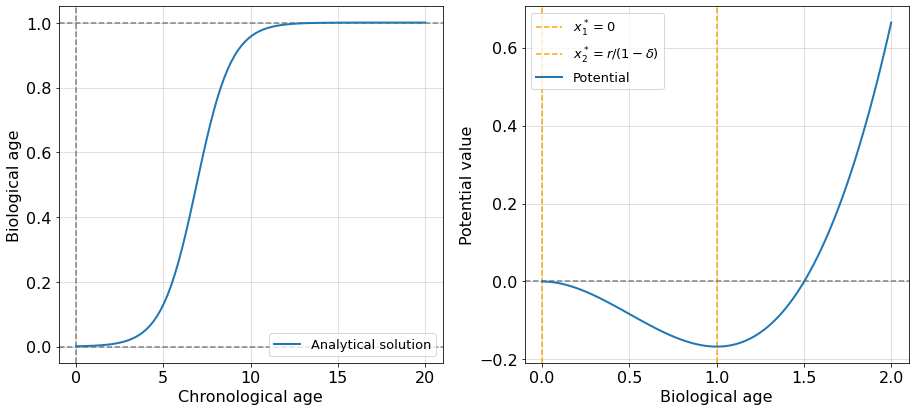

In [6]:
x_sol = lambda x0, t, r, d: r / (1 - d - (1 - d - r/x0)*np.exp(-r*t))
V = lambda x, r, d: (1 - d) * x**3 / 3 - r * x**2 / 2

r, d, c = 1, 0.001, 2.5
x0 = 0.001
t = np.linspace(0, 20, 100)
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots(1, 2, figsize=(13,6))
ax[0].set_xlabel('Chronological age')
ax[0].set_ylabel('Biological age')
ax[0].axhline(0, color='grey', ls='--')
ax[0].axhline(1, color='grey', ls='--')
ax[0].axvline(0, color='grey', ls='--')
ax[0].grid(alpha=0.5)
ax[0].plot(t, x_sol(x0, t, r, d), label=f'Analytical solution', lw=2);
ax[0].legend(loc='lower right', fontsize=13);

ax[1].set_xlabel('Biological age')
ax[1].set_ylabel('Potential value')
ax[1].axvline(0, color='orange', ls='--', label='$x^*_1=0$')
ax[1].axvline(r / (1 - d), color='orange', ls='--', label='$x^*_2=r/(1-\delta)$')
ax[1].axhline(0, color='grey', ls='--')
ax[1].plot(x, V(x, r, d), label=f'Potential', lw=2);
ax[1].grid(alpha=0.5)
ax[1].legend(loc='upper left', fontsize=13);
plt.tight_layout()

For non-aging organisms, everything looks like in the growth model with scaled biological age instead of population size. We have an attractor in a point $x^*=r/(1 - \delta)$ (which is a minimum of potential function), where $delta$ is a small number reflecting the small costs needed for organism maintenance. Let's assume the first intervention. Suppose the costs suddenly increase on a value of $1$ when the organism achieved chronological age $19$. To model such an intervention it's better to use the numerical modeling we learned earlier:

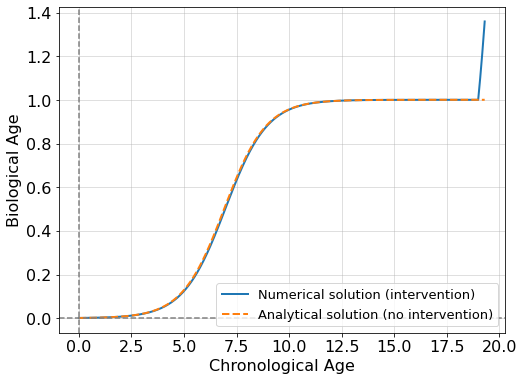

In [7]:
f = lambda x, t, r, d: r * x - (1. - d) * x**2

n = 1000 # number of integration steps
t = np.linspace(0, 19.3, n)
dt = t[1] - t[0] #time difference
r, d = 1., 0.001
x0 = 0.001
x = np.empty(n) #resulting integral
x[0] = x0 # assign initial condition

for i in range(1, n): #integrate from 1-st index
    if t[i] > 19:
        d = 1.001
    x[i] = x[i-1] + f(x[i-1], t[i-1], r, d) * dt

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set_xlabel('Chronological Age')
ax.set_ylabel('Biological Age')
ax.plot(t, x, label=f'Numerical solution (intervention)', lw=2);
ax.plot(t, x_sol(x0, t, r, 0.001), label=f'Analytical solution (no intervention)', lw=2, ls='--');
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='lower right', fontsize=13);

Wow, it's super fast! This intervention changes the behavior of the system making it grow. But is it stable growth? Might it be that the organism just takes a new biological age state? The answer is not, and to demonstrate it comprehensively we introduce the concept of a **bifurcation diagram**.

A bifurcation diagram is a plot with all possible $x^*$ depending on some system parameter (from \theta). In our current case, we are interested in parameter $\delta$ whose values determine the qualitative behavior of the system. A bifurcation diagram is better to plot by hand if possible.

```{figure} figs/bifurcation.png
:name: bifurcation
:width: 500
Bifurcation diagram for the toy aging model.
```

The solid blue line on the diagram is a set of stable solutions for the system {eq}`eq_aging_dummy`. The dashed blue line at point $x=0$, otherwise, a set of unstable solutions. The set of initial conditions taken above the stable line results in convergence to the stable solution. The set of initial conditions taken between the stable and the unstable lines results in convergence to the stable solution. Black arrows point in the direction of system evolution. When we increase $\delta$ starting from $0$ the stable solution increases in magnitude until we achieve point $\delta_c$ which is a critical threshold after which a bifurcation occurs. After crossing the critical threshold no physically stable solutions remain (here we assume that biological age cannot accept negative values, so the red line cannot be a solution) and the system is doomed to diverge.

Okay, let's gather two insights from the bifurcation diagram about our model: 

1. It is not necessary to cross the critical threshold to obtain an arbitrarily large biological age. It is enough that $\delta$ would be close to $1$.
2. Crossing the threshold guarantees system instability (**catastrophe**) which we can treat as an organism's *death*.

The organism can, in principle, live infinitely long with non-increasing $\delta$, but it seems like in real situations delta depends on time $t$ and some interventions than $x$ itself. Let's add this assumption to our model. Let $\delta$ now a rate of maintenance costs, i.e.:

$$
    \dot{x} = (r - x)x + \delta \cdot t \cdot x^2
$$ (eq_aging_dummy_time)  

We solve this equation numerically, but an analytical solution exists too (try the exercise below).

/tmp/ipykernel_187950/1557638224.py:1: RuntimeWarning: overflow encountered in double_scalars
  f = lambda x, t, r, d: r * x - (1. - d * t) * x**2


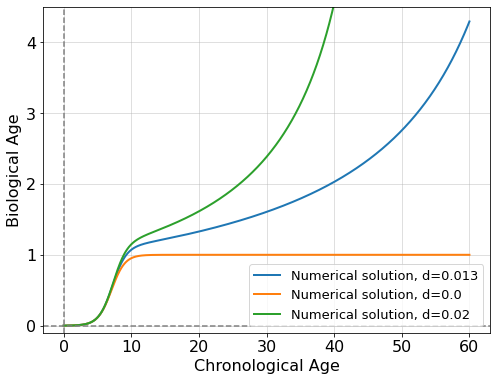

In [8]:
f = lambda x, t, r, d: r * x - (1. - d * t) * x**2

n = 1000 # number of integration steps
t = np.linspace(0, 60, n)
dt = t[1] - t[0] #time difference
r = 1
x0 = 0.001
x = np.empty(n) #resulting integral

fig, ax = plt.subplots(1, 1, figsize=(8,6))
for d in [0.013, 0., 0.02]:
    x[0] = x0 # assign initial condition
    for i in range(1, n): #integrate from 1-st index
        x[i] = x[i-1] + f(x[i-1], t[i-1], r, d) * dt
    ax.plot(t, x, label=f'Numerical solution, d={d}', lw=2);

ax.set_xlabel('Chronological Age')
ax.set_ylabel('Biological Age')

ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.set_ylim([-0.1, 4.5])
ax.legend(loc='lower right', fontsize=13);

At value $d=0.013$ this looks more realistic than the intervention case, we start aging after ending the growth proportionally to time. Indeed we grow rapidly at an earlier stage of life and, after that, start to age exponentially by a quadratic increase in costs of system maintenance. It should be emphasized that the resulting model is a toy model and rather serves the purpose of demonstrating how a slight modification of the logistic model can describe biological age. One should maintain a healthy skepticism about all such models and always question their usefulness and plausibility.

```{admonition} Exercise 5
:class: dropdown
Solve the equation {eq}`eq_aging_dummy_time` analytically and draw a bifurcation diagram (on a sheet of paper). What difference with the initial model?
```

This a good first step to the world of really complex aging models. But we already can say much even with these *one-dimensional* models. More insights are waiting for us in the multidimensional world which we will discuss below.


## System of differential equations

It's time to expand our understanding of dynamical systems to a multidimensional case. We first introduce a new concept of **state vector** $x$ which is a replacement for state variable $x$ used above for unidimensional dynamic systems. State vector is composed from $n$ vector **components** $\{x_i\}_n$ which represents different dynamical variables of a system (organism). State vector, in principle, can be composed from any physiological state variables (blood pressure, body temperature, heart rate, etc.), but it is important to choose such of them which describes the system most "completely". For example, when you try to build a dynamical model of a running human, it is desirable to include heart rate as variable into a state vector. On the other hand, such variable as hair length is apparently redundant to include. The same logic works for a model of aging. When we try to model it on a physiological level, tissue level or molecular level, different variables should be used. However, some models can comprise state variables from different levels of system organization. In this case, we need to bind them properly with functional relations. 

In this section we will consider molecular model of human aging building it based on the concept of **gene regulatory network**, which we discuss below.

### Stability in linear multidimensional case

Linear systems of differential equations allows to model a countless number of complex phenomena. We start with a simple model of gene regulation, which includes feedback control loop ({numref}`grn`). This is a scalable model proposed in {cite}`chen1999modeling` for modeling a number of genes. We restrict ourselves to a consideration only a one gene-rna-protein cascade where the protein acts as a regulator of the gene transcription.

```{figure} figs/gene_regulatory.png
:name: grn
:width: 500
Dynamic system of gene regulation.
```

We first write the system of differential equations and explain variables:

$$
     \begin{cases}
          \frac{dr}{dt} = - Vr + Cp  \\
          \frac{dp}{dt} = Lr - Up 
     \end{cases}
$$ (eq_linear_system)

where: 
* $r$ and $p$ are mRNA and protein relative concentrations correspondingly; 
* $V$ - degradation rate of mRNAs;
* $U$ - degradation rate of proteins;
* $L$ - translation rate;
* $C$ - transcription regulation rate. This constant determines a character of feedback loop. The protein is a transcriptional activator if $C>0$ and a repressor if $C<0$.

Let's combine both state variables into a state vector $x = [r, p]^T$ (we will use column notation for vectors). Then the right part of the equation {eq}`eq_linear_system` can be written as a matrix $M$ of coefficients multiplied by the state vector $x$:

$$
     \begin{bmatrix}
          \dot{r}\\
          \dot{p}
     \end{bmatrix}
     =
     \begin{bmatrix}
          -V & C \\
          L & -U
     \end{bmatrix}
     \begin{bmatrix}
          r\\
          p
     \end{bmatrix}
$$

or, in brief:

$$
     \dot{x} = Mx
$$

This system can be solved analytically, but now we use numerical solution with some constants.

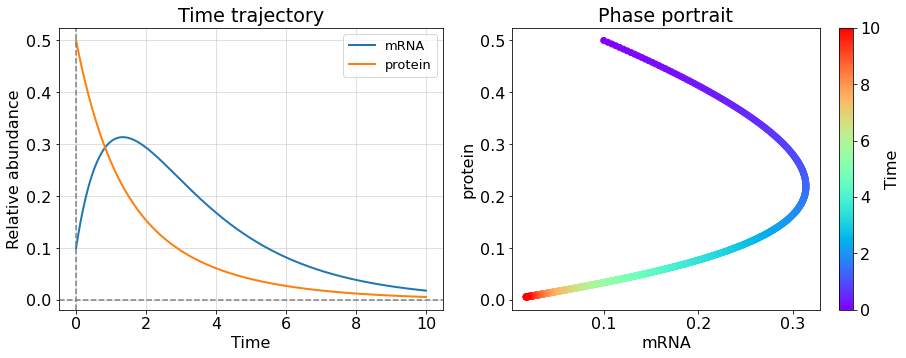

In [9]:
def compute_linear_ODE(t, x0, M):
    f = lambda x, M: M @ x
    dt = t[1] - t[0]
    x = np.empty((2, n))
    x[:, 0] = x0
    for i in range(1, m): #Forward Euler integration
        x[:, i] = x[:, i-1] + dt * f(x[:, i-1], M)
    return x

### SYSTEM MATRIX
V, U, C, L = 0.7, 0.7, 1.0, 0.1
M = np.array([[-V, C], 
              [L, -U]])
###

m = 1000 # number of time steps
t = np.linspace(0, 10, m)
x0 = np.array([0.1, 0.5]) #initial condition

x = compute_linear_ODE(t, x0, M)

def plot_linear_system(t, x, title=''):
    fig, ax = plt.subplots(1, 2, figsize=(13,5.5))
    fig.suptitle(title)
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('Relative abundance')
    ax[0].set_title('Time trajectory')
    ax[0].plot(t, x[0], label=f'mRNA', lw=2);
    ax[0].plot(t, x[1], label=f'protein', lw=2);
    ax[0].axhline(0, color='grey', ls='--')
    ax[0].axvline(0, color='grey', ls='--')
    ax[0].grid(alpha=0.5)
    ax[0].legend(loc='upper right', fontsize=13);
    sc = ax[1].scatter(x[0], x[1], c=t, cmap='rainbow')
    ax[1].set_title('Phase portrait')
    ax[1].set_xlabel('mRNA')
    ax[1].set_ylabel('protein')
    plt.colorbar(sc, label='Time')
    plt.tight_layout()
    plt.show()

plot_linear_system(t, x)

The constants of matrix $M$ were chosen so that system is stable, but how can we explore the stability in more general way? Previously we have seen that negative system constant $a$ (in the equation $\dot{x} = ax$) guarantees the system converges. Is there the similar property for the matrix $M$ making it "negative"? It turns out it is enough to require real part of all eigenvalues of matrix $M$ to be negative for a system stability. Matrix with all eigenvalues are negative called *negatively-definite matrix*. Let's find eigenvalues of matrix $M$. 

The characteristic equation for matrix M reads as follows:

$$
    \det{(M - \lambda I)} = 
    \begin{vmatrix}
        -V - \lambda & C \\
        L & -U - \lambda
    \end{vmatrix} = 0
$$
$$
    (-V - \lambda)(-U - \lambda) - LC = 0
$$
$$
    \lambda^2 + \lambda (U + V) + UV - LC = 0
$$

Solving this equation for $\lambda$ yields the following expression for eigenvalues:

$$
    \lambda_{1,2} = - \frac{U + V}{2} \pm \frac{\sqrt{(U - V)^2 + 4LC}}{2}
$$

Using the expression for the previous case ($V=0.7$, $U=0.7$, $C=1.0$, $L=0.1$) obtain the eigenvalues $\lambda_1=-0.384$, $\lambda_2=-1.016$ which are both negative and, therefore, system is stable. 

Let's play with the parameters and explore which regimes are possible for the system:

lmb1=(0.3+0j); lmb2=(-1.7-0j)


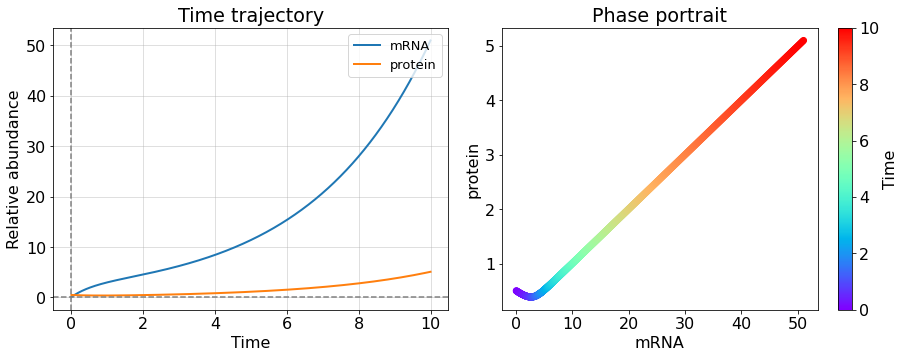

In [10]:
def compute_eigvals(U, V, C, L):
    U, V, C, L = map(np.complex128, [U, V, C, L]) #allows complex eigvals
    return (0.5 * (-(U + V) + np.sqrt((U - V)**2 + 4 * L * C)),
            0.5 * (-(U + V) - np.sqrt((U - V)**2 + 4 * L * C)))

#Case 1: unstable system, mRNA boost (large C)
U, V, C, L = 0.7, 0.7, 10.0, 0.1
eigvals = compute_eigvals(U, V, C, L)
M = np.array([[-U, C], [L, -V]])
x = compute_linear_ODE(t, x0, M)
print(f'lmb1={np.round(eigvals[0], 3)};', f'lmb2={np.round(eigvals[1],3)}')
plot_linear_system(t, x)

lmb1=(0.316+0j); lmb2=(-0.316-0j)


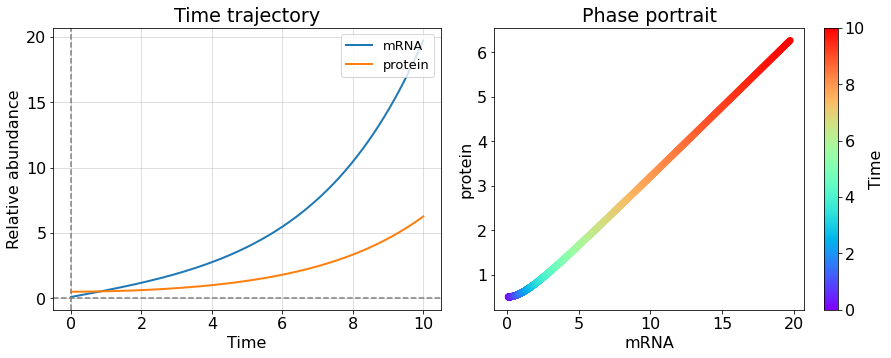

In [11]:
#Case 2: unstable system, no decay (U=0, V=0)
U, V, C, L = 0.0, 0.0, 1.0, 0.1
eigvals = compute_eigvals(U, V, C, L)
M = np.array([[-U, C], [L, -V]])
x = compute_linear_ODE(t, x0, M)
print(f'lmb1={np.round(eigvals[0], 3)};', f'lmb2={np.round(eigvals[1],3)}')
plot_linear_system(t, x)

lmb1=(-0.7+3j); lmb2=(-0.7-3j)


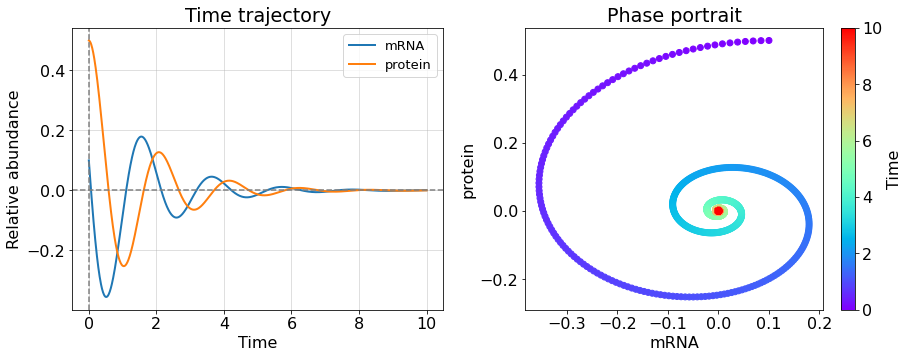

In [12]:
#Case 3: oscillation with decay, suppresion of transcription (C = -L)
U, V, C, L = 0.7, 0.7, -3.0, 3.0
eigvals = compute_eigvals(U, V, C, L)
M = np.array([[-U, C], [L, -V]])
x = compute_linear_ODE(t, x0, M)
print(f'lmb1={np.round(eigvals[0], 3)};', f'lmb2={np.round(eigvals[1],3)}')
plot_linear_system(t, x)

lmb1=(-0.7+0j); lmb2=(-0.7-0j)


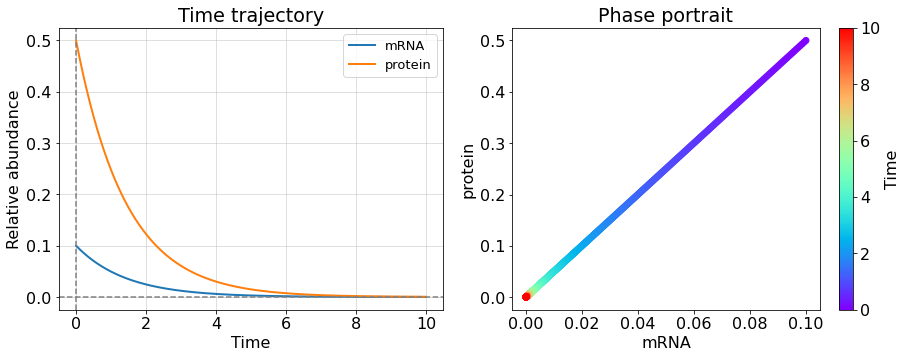

In [13]:
#Case 4: no feedback and translation, radioactive decay (C=L=0)
U, V, C, L = 0.7, 0.7, 0., 0.
eigvals = compute_eigvals(U, V, C, L)
M = np.array([[-U, C], [L, -V]])
x = compute_linear_ODE(t, x0, M)
print(f'lmb1={np.round(eigvals[0], 3)};', f'lmb2={np.round(eigvals[1],3)}')
plot_linear_system(t, x)

Even only one positive eigenvalue makes the system unstable as you could see this from cases 1 and 2 - this is general for system of any dimensionality. The more interesting case appeared before us once eigenvalues have non-zero imaginary part. The system becomes oscillating. Most of biological systems exhibit oscillating behavior (circadian rythm, glycolisis). Note that, oscillating systems also can be stable, unstable, and meta-stable and corresponding bifurcations can switch between these states. 

```{admonition} Exercise
:class: dropdown
Plot bifurcation diagram from parameter $C$ for the system above.
```

```{admonition} Exercise
:class: dropdown
Create a gene regulatory system with 2 genes (4 equations). Solve it numerically and plot trajectories. Compute eigenvalues numerically with function `numpy.linalg.eigvals`. Try to adjust parameters to make system stable.
```

One important observation is that we can say if the system will be stable or not by looking at one parameter - largest eigenvalue. Indeed, if largest eigenvalue is negative, then all others are also negative. It is a brilliant property of linear systems. But what about non-linear?

### Stability in non-linear multidimensional case

We start with rather simple but still tractable Michaelis-Menten gene regulatory model {cite}`alon2006introduction`. We first formulate this model for $n$ genes where each gene $x_i$ is regulated by others including itself:

$$
    \frac{dx_i}{dt} = -Bx_i + \sum^n_{j=1}A_{ij}\frac{x_j}{x_j + 1}
$$ (eq_mm_model)

Here, $B$ - degradation rate in a linear term we have seen earlier, we assume it is the same for all genes; $A_{ij}$ the regulatory constant which can take values $0$ or $1$ indicating the presence or absence of an activatory regulation. An element of matrix $A_{ij}$ is read as $A_{i\leftarrow j}$ meaning that $j$-th gene (column index) acts to $i$-th gene (row index). But wait, why the second non-linear term has so strange functional form? It is a saturating function converging to $1$ as $x_j$ increases. It turns out that it reflects quite simple idea of promoter regulation, namely, if some product of gene $j$ binds to a promoter of gene $i$ then this promoter is no more free for binding. Thus, the activatory effect is restricted with a number of different promoter binding sites for a particular gene what is reflected in the saturating functional form of the term.

You probably already guessed that $A$ is a kind of system matrix by analogy with the previous case. In fact now we are ready to formulate a concept of **network** more precisely. Gene regulatory network under our scope is determined with relations written in the adjacency matrix $A$ which just way to represent a graph. This matrix has a shape of $n\times n$ nodes, where node is a particular gene. Each pair of nodes are coupled with an edge. If such coupling exists, i.e. gene $i$ affects gene $j$, then $A_{ij}=1$. In case of the absense of a coupling - $A_{ij}=0$. One can say that matrix $A$ defines **topology** of the network.

Let's consider the simple case of $n=2$ genes by plotting the dynamics:

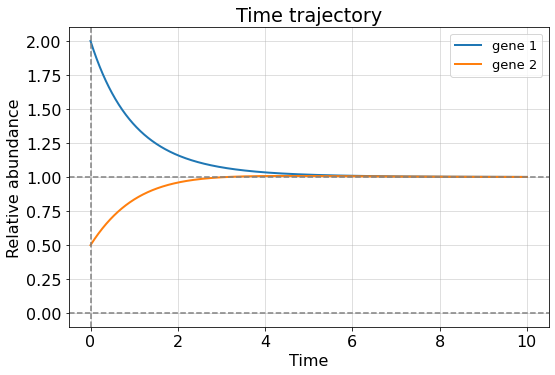

In [14]:
def compute_nonlinear_ODE(t, x0, A, B):
    f = lambda x, A, B: -B * x + A @ (x / (1 + x))
    dt = t[1] - t[0]
    x = np.empty((2, t.shape[0]))
    x[:, 0] = x0
    for i in range(1, m): #Forward Euler integration
        x[:, i] = x[:, i-1] + dt * f(x[:, i-1], A, B)
    return x

### SYSTEM MATRIX
A = np.array([[1, 1], 
              [1, 1]]) #genes regulate themselves and each other
###
B = 1 #degradation constant

m = 1000 # number of time steps
t = np.linspace(0, 10, m)
x0 = np.array([2., 0.5]) #initial condition

x = compute_nonlinear_ODE(t, x0, A, B)


fig, ax = plt.subplots(1, 1, figsize=(8,5.5))
ax.set_ylabel('Relative abundance')
ax.set_xlabel('Time')
ax.set_title('Time trajectory')
ax.plot(t, x[0], label=f'gene 1', lw=2);
ax.plot(t, x[1], label=f'gene 2', lw=2);
ax.axhline(0, color='grey', ls='--')
ax.axhline(1, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='upper right', fontsize=13);
plt.tight_layout()
plt.show()

There is something special in this model in a comparison with the previous. We can obtain a non-zero stationary ($t\to \infty$) solution for both genes if they cooperate enough. This means that gene regulatory network remains active for a long time until, for example, some perturbation occurs. 

Let's explore the stability properties of this system. As it was done for one-dimensional systems, we can start with computing fixed points for function $f$. The only difference is that now the $f$ is a vector function of $x = [x_1, x_2]^T$:

$$
    \frac{dx}{dt} = f(x)
$$

The fixed points then can be found from the equation:

$$
    f(x) = 0
$$

or more explicitly:

$$
    \begin{cases}
        f_1 = -Bx_1 + A_{11}\frac{x_1}{x_1 + 1} + A_{12}\frac{x_2}{x_2 + 1} = 0 \\
        f_2 = -Bx_2 + A_{21}\frac{x_1}{x_1 + 1} + A_{22}\frac{x_2}{x_2 + 1} = 0
    \end{cases}
$$ (eq_mm_right)

It is not easy to get the solution in a closed form (try it), but we can try to *guess* at least one solution: $x=[0, 0]^T$ which is true for any set of parameters. The plot above hints us that $x=[1, 1]^T$ is also a stationary solution (check it), but only for a specific set of parameters, namely, $B=1$ and matrix $A$ consisting of ones. We will check their stability. It turns out we already know how to do that (remember {ref}`stability-intuition`) with a linearization of function $f$. We need only to generalize the techinique to multidimensional case. It is time to get acquainted with **Hartman-Grobman theorem** (we use its interpretation from {cite}`garfinkel2017modeling`):

To determine the stability of an equilibrium point of a vector ﬁeld $f : R^n \to R^n$:
1. Find the linearization of $f$ at the equilibrium point, which is the Jacobian.
2. Determine the stability of this linear function, using the method of eigenvalues.
3. Provided no eigenvalue is zero or has zero real part, conclude that the equilibrium point of
the nonlinear system is qualitatively similar to that of its linearization.

Following this guidance, we need to find Jacobian first which is a full analog of $\lambda$ coefficient for multidimensional case:

$$
    J = 
    \begin{bmatrix}
        \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
        \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} 
    \end{bmatrix} = 
    \begin{bmatrix}
        \frac{A_{11}}{(x_1 + 1)^2} - B & \frac{A_{12}}{(x_2 + 1)^2} \\
        \frac{A_{21}}{(x_1 + 1)^2} & \frac{A_{22}}{(x_2 + 1)^2} - B
    \end{bmatrix}
$$

Estimate Jacobian in fixed points (remember that we need to substitute parameters $\theta = \{A_{ij}=1, B=1\}$ for point $x=[1, 1]^T$):

$$
    J(0,0) = 
    \begin{bmatrix}
        A_{11} - B & A_{12} \\
        A_{21} & A_{22} - B
    \end{bmatrix}; \ 
    J(1,1|\theta) = 
    \begin{bmatrix}
        -\frac{3}{4} & \frac{1}{4} \\
        \frac{1}{4} & -\frac{3}{4}
    \end{bmatrix}
$$

Consider the second case. By applying the method of eigenvalues learned in the previous paragraph have $\lambda_1=-0.5$ and $\lambda_2=-1$. At the last step of Hartman-Grobman procedure, we use the fact that both eigenvalues are non-zero and negative. Hence, we can conclude that system has a stable behaviour around fixed point $x=[1, 1]^T$.

```{admonition} Exercise
:class: dropdown
Explore the stability of the system in a vicinity of point $x=[0, 0]^T$. Obtain general expression for eigenvalues.
```

The limitations of Hartman-Grobman theorem follows from its requirement. The theorem fails to predict class of stability for a fixed point in case of some of eigenvalues are zero or have zero real part. The problem is that zero eigenvalues means the sytem is in critical state and any tiny change in the system parameters may switch it to the unstable regime. The problem becomes even harder when we work with really high-dimensional systems. We would like to develop the general framework for evaluating system resilience, i.e. how far its parameters from point of bifurcation, where the system dynamics dies.

### Universality and resilience

In this section, we will demonstrate exactly how complex systems can be reduced to simple universal laws. We will see that the system that we considered above obeys a universal law that allows us to investigate its stability and resilience (yes, in this section we will consider the difference between these two concepts). We will follow a framework developed in the paper {cite}`gao2016universal` which in short can be formulated as following. Consider a system consisting of $n$ components (nodes of a network) $x = (x_1, ..., x_n)^T$. The components of systems evolves according to the following general system of non-linear (in general) differential equations:

$$
    \frac{dx_i}{dt} = F(x_i) + \sum_{j=1}^n A_{ij}G(x_i, x_j)
$$ (eq_gao_general)

The first term on the right-hand side of the equation describes the self-dynamics of each component, while the second term describes the interactions between component $i$ and its interacting partners. The nonlinear functions $F(x_i)$ and $G(x_i, x_j)$ represent the dynamical laws that govern the system’s components, while the weighted connectivity matrix $A_{ij} > 0$ captures the positive interactions between the nodes. This is quite general form of non-linear equation and a lot of multidimensional dynamical systems can be described with it.

As we learned earlier, the stability of a system can be compromised if many system parameters are changed. This distinguishes multidimensional systems (networks) from one-dimensional ones they have a definite topology of interaction network. The brilliant discovery of the paper under consideration is that we can compute universal number which characterize a total network topology of equation {eq}`eq_gao_general`. The main result of the paper is that we can rewrite {eq}`eq_gao_general` in one-dimensional form as follows:

$$
    \frac{dx_{eff}}{dt} = F(x_{eff}) + \beta_{eff}G(x_{eff}, x_{eff})
$$ (eq_gao_1d)

where $x_{eff}$ - is an effective dynamic component representing "average" dynamics of the whole system, and $\beta_{eff}$ - is a effective topological characteristic of the network which is actually a macroscopic description of $n^2$ microscopic parameters of matrix $A$. They can be computed as follows:

$$
    x_{eff} = \frac{\mathbf{1}^T Ax}{\mathbf{1}^TA\mathbf{1}} = \frac{\langle s^{out}x \rangle}{\langle s \rangle};\ 
    \beta_{eff} = \frac{\mathbf{1}^T As^{in}}{\mathbf{1}^TA\mathbf{1}} = \frac{\langle s^{out}s^{in} \rangle}{\langle s \rangle}
$$

where $\mathbf{1}$ is a vector of ones of length $n$; $s^{in}$ - vector of in-degrees of matrix $A$, i.e. sum of column elements; $s^{out}$ - vector of out-degrees of matrix $A$, i.e. sum of row elements. The angle brackets $\langle . \rangle$ means averaging across vector elements (don't worry the code below will make things easier). For example, $\langle s \rangle$ means averaging across all degree elements of matrix $A$ (in-degree or out-degree), actually $\langle s^{in} \rangle=\langle s^{out} \rangle=\langle s \rangle$.

So, let's apply the framework to already familiar 2-dimensional task, namely:

$$
    \frac{dx_{eff}}{dt} = -Bx_{eff} + \beta_{eff}\frac{x_{eff}}{1 + x_{eff}}
$$

Remember that $B=1$ and $A$ is a matrix of ones, then have:

In [15]:
A = np.array([[1, 1], 
              [1, 1]])
n = A.shape[0]
vec1 = np.ones((n, 1))
sout = A.sum(0) #out-degrees 
sin = A.sum(1) #in-degrees 
savg = (vec1.T @ A @ vec1).item() / n # <s>
beff = (sout * sin).mean() / savg

print("beta_eff =", beff)

beta_eff = 2.0


Then obtain a separable differential equation (which has an analytical solution!).

$$
    \frac{dx_{eff}}{dt} = -x_{eff} + 2\frac{x_{eff}}{1 + x_{eff}}
$$

You probably already see that this equation has a stable non-zero solution. But how can we deny ourselves the pleasure of exploring it?

The fixed points are:

$$
    x^*_1 = 0;\ x^*_2 = \frac{\beta_{eff}}{B} - 1 = 1
$$ (eq_universal_params)

The stability parameter $\lambda$ is:

$$
    \lambda = -B + \frac{\beta_{eff}}{(1 + x^*)^2} \\
    \lambda|_{x^*=0} = 1; \ \lambda|_{x^*=1} = -0.5
$$

Indeed, it works properly! We had a stable point at $x=[1,1]^T$ and unstable at $x=[0,0]^T$ in multidimensional case. As result, their one dimensional analogs have the proper stability property. Someone will say: "Well, but what about really multidimensional systems?"

We will use the transcriptional regulatory network in yeast proposed in {cite}`balaji2006comprehensive`. The full network contains 4441 nodes but we restricted it only to a number of 157 transcription factors (i.e. having non-zero out-degree (non-zero sum of columns) in the original matrix). We attached a file with the data to a repository of this book. Let's take a look at it.

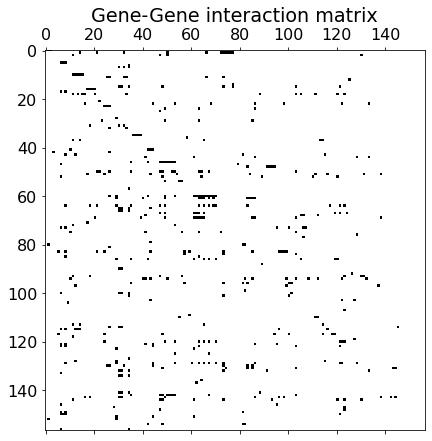

In [16]:
#load numpy data array
A = np.load('data/yeast.npy')
plt.figure(figsize=(7,7))
plt.title('Gene-Gene interaction matrix') 
plt.spy(A); #non-zero values are black pixels

One can see that that this is actually a sparse matrix. Look at the dynamics of some of its components starting with initial conditions $x(0)=[2, ..., 2]^T$. We also compute $x_{eff}$ and $\beta_{eff}$

beta_eff = 3.446938775510204


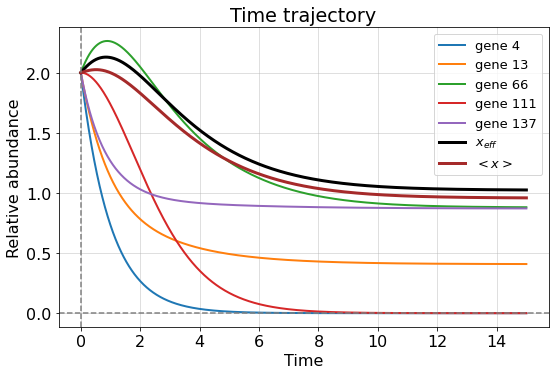

In [17]:
def compute_nonlinear_ODE(t, x0, A, B):
    f = lambda x, A, B: -B * x + A @ (x / (1 + x))
    n = A.shape[0]
    dt = t[1] - t[0]
    x = np.empty((n, t.shape[0]))
    x[:, 0] = x0
    for i in range(1, t.shape[0]): #Forward Euler integration
        x[:, i] = x[:, i-1] + dt * f(x[:, i-1], A, B)
    return x

def compute_eff(A, x):
    n = A.shape[0]
    vec1 = np.ones((n, 1))
    sout = A.sum(0)
    sin = A.sum(1)
    savg = (vec1.T @ A @ vec1).item() / n
    xeff = np.mean(sout[:, None] * x, axis=0) / savg
    beff = (sout * sin).mean() / savg
    return xeff, beff

### SYSTEM MATRIX
A = np.load('data/yeast.npy') #gene regulatory network
###
B = 1 #degradation constant

n = A.shape[0]
m = 1000 # number of time steps
t = np.linspace(0, 15, m)
x0 = np.ones(n) * 2. #same initial condition
#x0 = np.random.random(n)*3 #random initial condition

x = compute_nonlinear_ODE(t, x0, A, B)
xeff, beff = compute_eff(A, x) #compute effective dynamics and topological characteristic

print("beta_eff =", beff)
fig, ax = plt.subplots(1, 1, figsize=(8,5.5))
ax.set_ylabel('Relative abundance')
ax.set_xlabel('Time')
ax.set_title('Time trajectory')
for i in [3, 12, 65, 110, 136]:
    ax.plot(t, x[i], label=f'gene {i+1}', lw=2);
ax.plot(t, xeff, label='$x_{eff}$', lw=3, color='black')
ax.plot(t, x.mean(0), label='$<x>$', lw=3, color='brown')
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')
ax.grid(alpha=0.5)
ax.legend(loc='upper right', fontsize=13);
plt.tight_layout()
plt.show()

We observe different dynamics for genes. Some of them are upregulated by others and coverge to a stationary value, others are do not have positive regulation and exhibit a decay trajectory with a rate of $B$. Nevertheless we call this dynamics is stable and non-zero because the average dynamics is not equal to zero ($\langle x\rangle \neq 0$). Note that effective dynamics $x_{eff}$ is not equal to the average one due to slightly different weighing.

The second interesting result of the {cite}`gao2016universal` paper is that topological characteristic $\beta_{eff}$ can be decomposed in well-interpretable topological properties. Let's write the following relation:

$$
    \beta_{eff} = \langle s\rangle + SH
$$ (eq_network_topology)

We already know $\langle s \rangle$ is a average degree of elements, but it has another name - **density** of a network; $S$ represents the **symmetry** of network $A$, and $H$ represents **heterogeneity**. They can be computed as follows:

$$
    S = \frac{\langle s^{in}s^{out} \rangle - \langle s^{in} \rangle\langle s^{out} \rangle}{\sigma_{in}\sigma_{out}};\ 
    H = \frac{\sigma_{in}\sigma_{out}}{\langle s \rangle}
$$

where $\sigma_{in}$ and $\sigma_{out}$ are standard deviations of elements of vectors $s^{in}$ and $s^{out}$ correspondingly. 

To develop a better intuition on **density**, **symmetry**, and **heterogeneity** of a network, look at the picture from the original paper:

```{figure} figs/topology_properties.png
:name: topology
:width: 700
The topological characteristics of a network.
```

The density property is quite self-explainable - it is just an average number of in/out degrees in a network. The symmetry means that most of nodes have bi-directed edges to each other. An asymmetric network is one where nodes with a large in-degree tend to have a small out-degree. The large heterogeneity means that some nodes may have large in/out degrees and others - small. In the network with small heterogeneity, all nodes have almost equal degrees. Let's compute them and check that hey are actually sum into $\beta_{eff}$.

In [18]:
def compute_topological_characteristics(A):
    n = A.shape[0]
    vec1 = np.ones((n, 1))
    sout = A.sum(0)
    sin = A.sum(1)
    sout_avg = sout.mean()
    sin_avg = sin.mean()
    savg = (vec1.T @ A @ vec1).item() / n #density
    S = ((sout * sin).sum()/n - sin_avg * sout_avg) / (sin.std(ddof=1) * sout.std(ddof=1)) #symmetry
    H = (sin.std(ddof=1) * sout.std(ddof=1)) / savg #heterogenity
    return savg, S, H

savg, S, H = compute_topological_characteristics(A)
print('<s> = ', round(savg, 3))
print('S =', round(S, 3))
print('H =', round(H, 3))
print('beta_eff == <s> + SH:', beff == savg + S * H)

<s> =  3.121
S = 0.083
H = 3.938
beta_eff == <s> + SH: True


These nice network characteristics confer us an instrument for improvement $\beta_{eff}$ value. You remember expression {eq}`eq_universal_params`? It is time to plot bifurcation diagram!

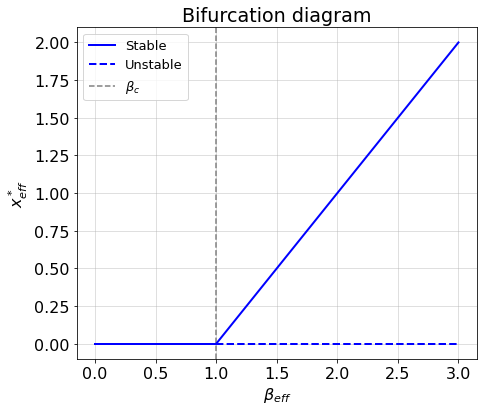

In [19]:
beta0 = np.linspace(0, 1, 100)
beta1 = np.linspace(1, 3, 100)
x_star0 = np.zeros(beta0.shape[0])
x_star1 = beta1 / B - 1

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
ax.set_xlabel(r'$\beta_{eff}$', fontsize=16)
ax.set_ylabel(r'$x^*_{eff}}$', fontsize=16)
ax.set_title('Bifurcation diagram')
ax.plot(beta0, x_star0, lw=2, color='b');
ax.hlines(0, 1, 3, color='b', ls='--', lw=2)
ax.axvline(1, color='grey', ls='--')
ax.plot(beta1, x_star1, lw=2, color='b');
ax.grid(alpha=0.5)
ax.legend(['Stable', 'Unstable', r'$\beta_c$'], loc='upper left', fontsize=13);
plt.tight_layout()
plt.show()

We have stable non-zero solution while $\beta_{eff} > \beta_c$. The critical value of $\beta_c=1$ is a root of the second expression in {eq}`eq_universal_params`. Of course, crossing the $\beta_c$ from right to left leads to a bifurcation and a cell dies. What else interesting about value of $\beta_{eff}$ is that it represents the reserve of **resilience** in the system. If some topological perturbation occurs (e.g. some edges are removed) then it is better to have larger value $\beta_{eff}$, otherwise the system is under risk of a killing bifurcation. 

How can we improve the resilience? From the equation {eq}`eq_network_topology` we see several options:
1. Make the network more dense;
2. If $S$ is negative - decrease its absolute value;
3. If $S$ is positive - increase its absolute value;
4. Increase $H$ if $S$ is positive;
5. Decrease $H$ if $S$ is negative.

Let's follow the first case and consider how random weights perturbation affects resilience on a bifurcation diagram.

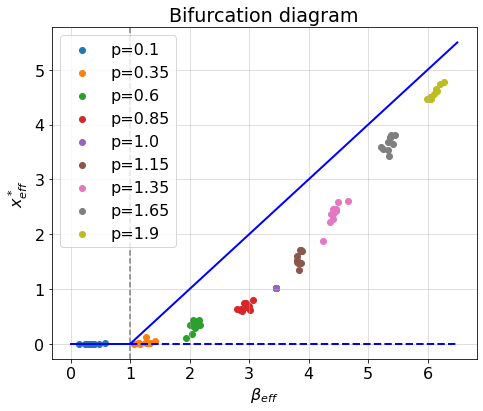

In [20]:
def get_perturbed_network(A, p=0.1):
    """
    Function for netwrok perturbation
    """
    A_pert = A.copy()
    nzidx = np.argwhere(A_pert)
    if p < 1.0:
        n_pert = int(nzidx.shape[0] * (1 - p))
        idx = np.random.choice(np.arange(nzidx.shape[0]), n_pert, replace=False)
        A_pert[nzidx[idx].T[0], nzidx[idx].T[1]] = 0
    else:
        zidx = np.argwhere(A_pert==0)
        n_pert = int(nzidx.shape[0] * (p - 1.0))
        idx = np.random.choice(np.arange(zidx.shape[0]), n_pert, replace=False)
        A_pert[zidx[idx].T[0], zidx[idx].T[1]] = 1
    return A_pert

k = 10 #number of repetitions
t = np.linspace(0, 20, 1000)
x0 = np.ones(n) * 0.5
fig, ax = plt.subplots(1, 1, figsize=(7, 6))
for p in [0.1, 0.35, 0.6, 0.85, 1.0, 1.15, 1.35, 1.65, 1.9]:
    beta_list = []
    x_list = []
    for _ in range(k):
        A_pert = get_perturbed_network(A, p=p)
        x = compute_nonlinear_ODE(t, x0, A_pert, B=1)
        xeff, beff = compute_eff(A_pert, x) #compute effective dynamics and topological characteristic
        beta_list.append(beff)
        x_list.append(xeff[-1])
    ax.scatter(beta_list, x_list, label=f'p={p}') 

beta0 = np.linspace(0, 1, 100)
beta1 = np.linspace(1, 6.5, 100)
x_star0 = np.zeros(beta0.shape[0])
x_star1 = (beta1 / B) - 1

ax.set_xlabel(r'$\beta_{eff}$', fontsize=16)
ax.set_ylabel(r'$x^*_{eff}}$', fontsize=16)
ax.set_title('Bifurcation diagram')
ax.plot(beta0, x_star0, lw=2, color='b');
ax.hlines(0, 1, 6.5, color='b', ls='--', lw=2)
ax.axvline(1, color='grey', ls='--')
ax.plot(beta1, x_star1, lw=2, color='b');
ax.grid(alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()

The colored points on a bifurcation diagram are values of $x_{eff}$ computed from the simulations of multidimensional systems at different perturbation rates $p$. If $p<0$ the perturbation rate means how much non-zero weights in matrix $A$ shoul be left after the perturbation, else, if $p>=1$ the perturbation rate means how much edges should be added in matrix $A$. Hence, by incerasing $p$ we increase density of a network. Why do the points do not go strictly with the theoretical prediction, but move away from the theoretical curve, and then again approach it? The reason is a **sparcity**. The developed theory fails to predict a stationary behavior of too sparse networks because nodes in such networks interact weakly. However, more dense network are predictable and we can use all the fruits of the original theory (or develop something better?). In any case, we see that the theory works correctly and provides a nice one-dimensional approximation for the network providing us a resilience coefficient $\beta_{eff}$ which we can directly apply in practice.

But wait a minute, have we come all this way through multi-dimensional dynamical systems to get back to a one-dimensional coefficient? You see that the answer is both yes and no. One-dimensional mean-field approximations are an amazing theoretical result, but not all models can achieve such an approximation. In general, we must be prepared to integrate multidimensional systems as is. It is important to recall that everything we have studied so far concerns only deterministic dynamical systems. The world is much more complicated ... 


```{admonition} Exercise
:class: dropdown
Repeat all the steps of analysis with model $\frac{dx_i}{dt} = -Bx_i + \sum^n_{j=1}A_{ij}\frac{x^2_j}{x^2_j + 1}$. Draw bifurcation diagram. What specific you can say about behavior around $\beta_c$?
```

### The remark on complex system aging

From the previous model, we saw that there are many ways to reduce the resilience of the system to such an extent that the system (organism) can no longer cope with the next perturbation and a catastrophic bifurcation occurs. The hypothesis of aging as a complex system in which resilience decreases is not very optimistic, in the sense that it immediately follows that aging is mostly stochastic. However, the optimistic side of this hypothesis is that if we can find a systemic effect on the body that improves its resilience, then we may well be able to avoid aging. Thus, we could improve the dynamic model by supplementing it with the mechanisms of action of various metabolites on the gene regulatory network and get a playground for testing drugs that have a systemic effect on a body resilience. In the end, it's possible that the complex system model is simply wrong and we need to look for something better.

## Critical slowing down

"The bifurcation theory predicts that approaching to a critical transition boundary (aka tipping point) is accompained with the system critical slowing down and an increase in variance and temporal autocorrelations of system state variable" - do your remember this citation from the previous chapter? In this section we discuss the explicit mathematical background of the phenomenon. We also introduce one additional instrument which is widely used in dynamical modelling, namely, stochasticity. In this section we will mostly rely on the theoretical results form the paper {cite}`scheffer2009early`.

### Introduce a stochastic model

In contrast to the previous section, we return to the one dimensional models, in addition, we understood that some of multidimensional models can be reduced to one-dimensional allowing to analyze system resilience in more compact form. We start with a new model which is a combination of what we learned above:

$$
    \dot{x} = x(1 - \frac{x}{K}) - c \frac{x^2}{1 + x^2} + \sigma \epsilon
$$ (eq_slowing_down)

We have seen all the parts of this equation. The first quadratic term describes the growth of something with a carrying capacity $K$. The second term is similar to what we have seen in the previous section (especially if you did the exercise), it describes some saturating removal of something from the system with rate $c$. For example, this model can describe a number of senescent cells in the organism which has a limited capacity for the growth and they are removed by the immune system. The last term represents the noise in the growth condition by a plephora of random factors which we do not know explicitly and just model them by random gaussian noise $\epsilon \sim \mathbf{N}(0, 1)$ with average $0$ and standard deviation of $1$. After multiplication with $\sigma$ the standard deviation is scaled. The presented stochastic model is simple and do not require a lot of specific knowledge for modeling as we will see it below.  

```{admonition} Exercise
:class: dropdown
Compute the potential function for the deterministic part of {eq}`eq_slowing_down`.
```

### Slowing down intuition

Critical slowing down arises in dynamical systems which undergoes changing in their parameters. If some parameter changes in such way that it moves the system to the bifurcation point (critical point), several interesting effects in actual dynamics can be observed. There are three such effects:

If the system is driven by stochastic force, the critical slowing down manifests itself in:
1. Increase in variance of system variable;
2. Increase in autocorrelation of system variable;
3. Increase in cross-correlation between different system variables;

We discuss the first and the second hallmarks of critical slowing down that can be easily observed in one-dimensional system. We will change the parameter $c$ from the system above and move, therefore, system to the bifurcation. Below we write some code for simulating the equation {eq}`eq_slowing_down` and the potential function for the deterministic part of the equation.

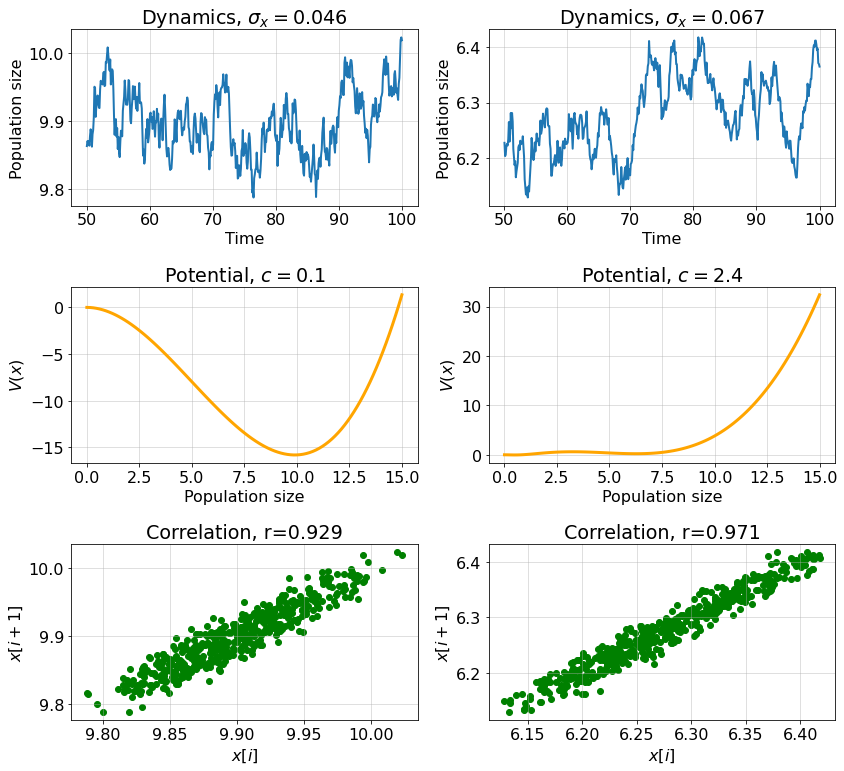

In [21]:
def compute_nonlinear_SDE(t, x0, K, c, sigma=0.05):
    f = lambda x, K, c: x * (1 - x/K) - c * (x**2 / (1 + x**2))
    dt = t[1] - t[0]
    n = t.shape[0]
    x = np.empty((n))
    x[0] = x0
    for i in range(1, n): #Forward Euler integration
        eps = np.random.randn(1) #N(0, 1)
        x[i] = x[i-1] + dt * f(x[i-1], K, c) + np.sqrt(dt) * sigma * eps #note about square root of dt
    return x

V = lambda x, K, c: -c * (np.arctan(x) - x) + x**3 / (3 * K) - x**2 / 2 #potential function

n = 1000 # number of integration steps
t = np.linspace(0, 100, n)
xx = np.linspace(0, 15, 100) #support for the potential function 
K = 10. #carrying capacity
x0 = 10.0

fig, ax = plt.subplots(3, 2, figsize=(12,11))
for i, c in enumerate([0.1, 2.4]): #different removal rates (aka harvest rate)
    x = compute_nonlinear_SDE(t, x0, K, c=c, sigma=0.05)
    v = V(xx, K, c=c)
    #dynamics
    std = np.std(x[n//2:], ddof=1)
    ax[0, i].set_xlabel('Time')
    ax[0, i].set_ylabel('Population size')
    ax[0, i].set_title(f'Dynamics, $\sigma_x={round(std, 3)}$')
    ##plot from the middle
    ax[0, i].plot(t[n//2:], x[n//2:], lw=2);
    ax[0, i].grid(alpha=0.5)
    #potential
    ax[1, i].set_xlabel('Population size')
    ax[1, i].set_ylabel('$V(x)$')
    ax[1, i].set_title(f'Potential, $c={c}$')
    ax[1, i].plot(xx, v, lw=3, color='orange');
    ax[1, i].grid(alpha=0.5)
    #correlation
    r = np.corrcoef(x[n//2:-1], x[n//2+1:])[0,1]
    ax[2, i].set_xlabel('$x[i]$')
    ax[2, i].set_ylabel('$x[i+1]$')
    ax[2, i].set_title(f'Correlation, r={round(r, 3)}')
    ax[2, i].scatter(x[n//2:-1], x[n//2+1:], color='green');
    ax[2, i].grid(alpha=0.5)

plt.tight_layout()

The upper plots show the actual system dynamics aroun equilibrium point under stochastic perturbations. Note that we observe dynamics from the moment $t=50$. Take a closer look! The dynamics in the right picture became a little smoother, the distances between the peaks are larger, and the range has increased. In contrast the dynamics on the left picture is more sharp and the range is smaller. In order to understand why this happens, you need to imagine the ball placed in the two potential landscapes depicted in the middle pictures. If the landscape is sharp, then the ball will quickly come to equilibrium, if the landscape is flat, then the ball will roll from side to side for a long time, until it finally converges to a minimum. Seriously, if you have a glass or metal ball and plates with different heights of sides at home - try it! 

The first hallmark of a critical slowdown - an increase in variance can be seen in the headers to the top panels. The variance has really increased. We will demonstrate the second hallmark of a critical slowdown by correlating between neighboring values of $x$ (instead of plotting a whole autocorrelation graph) - see the bottom plots on the panel. The correlation between neighboring values has indeed increased. 

It is worth noting that there are also systems that may not show critical slowing down when approaching the bifurcation point. However, apparently, these systems are quite exotic and our search for signs of criticality can bear fruits with a high probability.

### Construct a resilience indicator from data

We have studied quite useful tools for data analysis. Can we use them to create an organism resilience indicator? The good resilience indicator should satisfy not only the all three properties mentioned above, but how one-dimensional variable can satisfy the third one? There is one way to do that by constructing a new latent variable from initial organism state variables. Moreover, the good resilience indicator is expected to be negatively correlated with age. How to deal with all of that? Let's do it step by step.

First let's get the real data of mouse complete blood count (CBC) analysis. We will use one prepared dataset from the {cite}`avchaciov2022unsupervised`. As authors mentioned, the samples were obtained from NIH Swiss male and female mice from Charles River Laboratories (Wilmington, MA) - please refer to the original paper for the details. We will use only one cohort of male mice to avoid batch effect.

In [22]:
#load the data
import pandas as pd
df = pd.read_csv('data/validation_data.csv')
df = df[df['label'] == 'MA0072_M'] #filter only one male cohort
df.columns

Index(['uid', 'sex', 'age', 'label', 'ba %', 'ba (k/ul)', 'bmi', 'bw', 'crp',
       'dia', 'eo %', 'eo (k/ul)', 'flow', 'glu', 'gr %', 'gr (k/ul)', 'gs',
       'hb (g/dl)', 'hct %', 'hr', 'ins', 'kc', 'ly %', 'ly (k/ul)',
       'mch (pg)', 'mchc (g/dl)', 'mcv(fl)', 'mean', 'mo %', 'mo (k/ul)',
       'mpv (fl)', 'ne %', 'ne (k/ul)', 'pct', 'pfi', 'plt (k/ul)',
       'rbc (m/ul)', 'rdw %', 'retic %', 'retic (m/ul)', 'sys', 'tg', 'volume',
       'wbc (k/ul)', 'dFI'],
      dtype='object')

The dataset contains a lot of fields describing different characteristics of mice. The detailed description of fields can be found [here](https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-022-34051-9/MediaObjects/41467_2022_34051_MOESM4_ESM.xlsx).

Let's consider only some of them:

In [23]:
# name of field (units):
# hb (g/dl) - hemoglobin
# rbc (m/ul) - red blood cell counts
# hct (%) - hematocrit
# age (weeks) - mouse age
# uid - mouse unique identifier
features = ['hb (g/dl)', 'rbc (m/ul)', 'hct %']
df[['uid', 'sex', 'age', *features]].sample(5)

,uid,sex,age,hb (g/dl),rbc (m/ul),hct %
276,swiss-2116,M,66.0,16.9,9.15,46.3
231,swiss-2036,M,81.0,14.7,8.94,44.4
243,swiss-2054,M,94.0,14.7,8.59,41.4
281,swiss-2200,M,81.0,13.9,7.66,41.7
221,swiss-2033,M,94.0,13.2,7.11,38.9


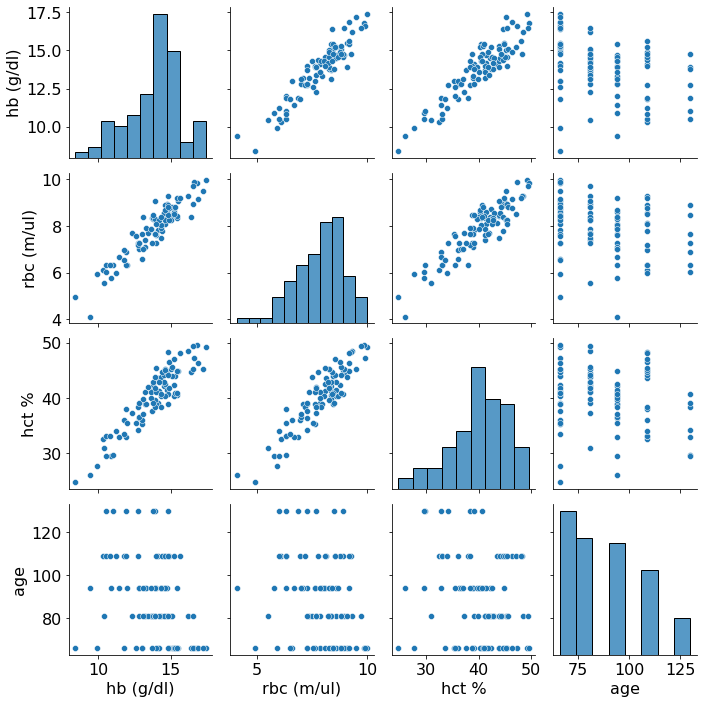

In [24]:
# plot their distributions and correlations with age and each other
import seaborn as sns
sns.pairplot(df[features + ['age']]);

All three characteristics have a high value of correlation - this is not surprisingly because all of them are related to the blood erythrocytes. However, their correlation is something that we need. We start with checking the third hallmark of criticality: variabels should show an increase in cross correlation with age. Let's check it after data preprocessing where we first exclude all animals younger than 16 months. It is important because we have small amount of data where effects of organism growth can be prevalent over aging.

In [25]:
###Prepare data
#filtering out young mice
df = df[df['age'] > 69] #older than 16 months

#remove outliers
for col in features:
    q_low = df[col].quantile(0.01)
    q_hi  = df[col].quantile(0.99)
    df = df[(df[col] < q_hi) & (df[col] > q_low)]

dff = df[features + ['age', 'uid']].dropna(axis=0)
#standard scaling features
X = (dff[features] - dff[features].mean()) / dff[features].std()

We will use standard scaled data because we want no to work with side effects from different variances of variables. The below code calculates the cross correlations between pairs of selected variables at each age point.

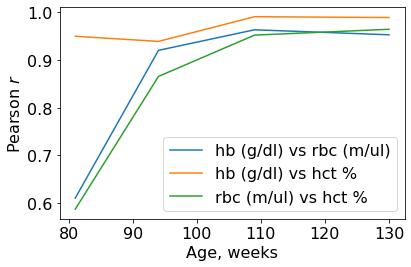

In [26]:
#build cross-correlation plot
pairs = [['hb (g/dl)', 'rbc (m/ul)'], ['hb (g/dl)', 'hct %'], ['rbc (m/ul)', 'hct %']]
ages = np.sort(dff.age.unique())
fig, ax = plt.subplots(figsize=(6,4))
for pair in pairs:
    cors = []
    for a in ages:
        # compute pairwise correlations between variables at each age
        cor = dff[dff['age'] == a].drop(['age', 'uid'], axis=1).corr() #<- method for pairwise corr-s
        cors.append(cor.loc[pair[0], pair[1]])
    ax.plot(ages, cors, label=f'{pair[0]} vs {pair[1]}')
ax.set_ylabel('Pearson $r$')
ax.set_xlabel('Age, weeks')
ax.legend()
plt.tight_layout()

Not bad! The variables pass one of the requirements. The cross correlation increase for all pairs. 

Next we construct the unite latent variable from these three. For that it is convenient to use principal component (PC) scores as a result of principal component analysis (PCA). Since the variables are highly correlated with each other you may think about resulting $PC_1$ scores as of "mean" of vector variables (we will include clarifications on PCA in future versions of the book).

In [27]:
from sklearn.decomposition import PCA
from scipy.stats import linregress

p = PCA(3).fit_transform(X)
tmp = pd.DataFrame([*p.tolist()], columns=['pca1', 'pca2', 'pca3']).join(dff[['age', 'uid']].reset_index())

```{admonition} Exercise
:class: dropdown
Plot the first principal component scores (`z[:, 0]`) along with the selected data variables. Plot also average vector of variables. Compute all pairwise correlations. Make sure the $PC_1$ looks like average.
```

Next, we need to check that resulting latent variable is correlated with age, we can just fit a linear model to check this.

In [28]:
#fit linear regression
(slope, intercept, r_corr, pval, _) = linregress(tmp['age'], tmp['pca1'])
print('Results of linear regression:')
print(f" slope = {round(slope,3)}\n pearson r = {round(r_corr, 3)}\n P-value = {round(pval, 4)}")

Results of linear regression:
 slope = 0.035
 pearson r = 0.321
 P-value = 0.0133


Indeed, we obtained a significant (at the level of 0.05) positive correlation with age. Let's construct a nice plot from `seaborn` package.

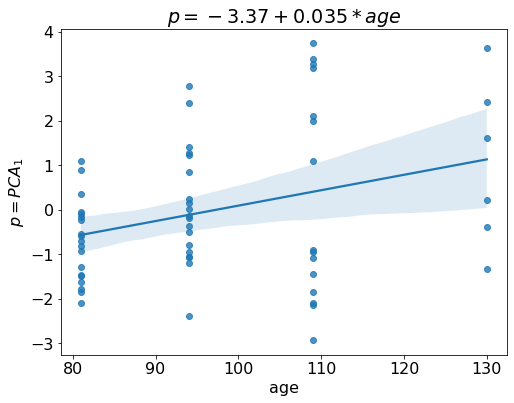

In [29]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x='age', y='pca1', data=tmp,  x_ci='sd', scatter=True)
ax.set_title(f'$p = {round(intercept, 2)} + {round(slope, 3)}*age$');
ax.set_ylabel('$p=PCA_1$');

This looks like what we sought. The function `regplot` computes variances at each level of age and these variances look increasing. Can we check this more explicitly with some test? Instead of telling long story about **heteroskedasticity** we just propose to you to compute one additional linear regression. This is a linear regression of absolute residuals (from the previous regression) versus age. The intution behind is quite straightforward, if variance increases with age, then absolute residuals from regression fit should increase too. Let's check:

In [30]:
y_predict = tmp['age'] * slope + intercept
abs_resid = np.abs((tmp['pca1'] - y_predict))
(slope, intercept, r_corr, pval, _) = linregress(tmp['age'], abs_resid)
print('Results of linear regression:')
print(f" slope = {round(slope,3)}\n pearson r = {round(r_corr, 3)}\n P-value = {round(pval, 4)}") 

Results of linear regression:
 slope = 0.028
 pearson r = 0.472
 P-value = 0.0002


It actually does! We obtained positive and significant correlation between residuals and age. Thus, we satisfied the second requirement: the increase in variance with age. The last requirement is an increase in autocorrelation.

There is one big problem in all computational aging biology domain: too few **longitudinal data**. Longitudinal data is a just multiple observations of the same organism in the same conditions across time. Unfortunately, most of the biological studies require killing an organism to take a sample. It is not so easy to take a blood sample and save life of a tiny mouse. And, of course, it is not cheap. In our dataset, however we have a few longitudinal points, let's look at them:

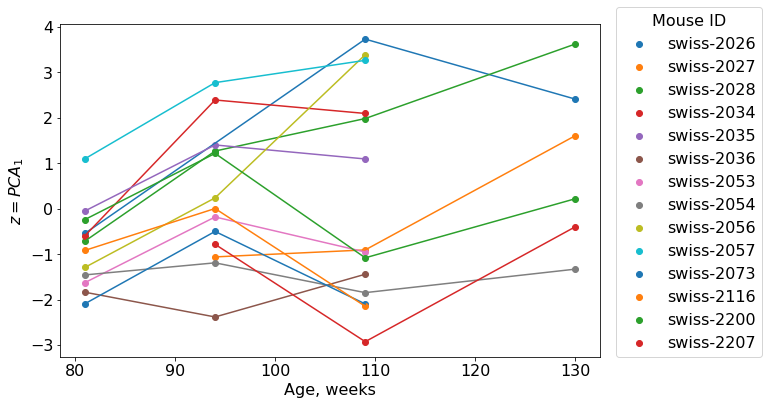

In [31]:
#group data by mouse id
long = tmp.groupby(['uid']).count()['age']
longmice = tmp[tmp['uid'].isin(long[long >= 3].index)]

#Look at longitudinal mice data
fig, ax = plt.subplots(figsize=(11,6))
for i in longmice.uid.unique():
    tt = longmice[longmice.uid == i]
    plt.plot(tt.age, tt.pca1)
    plt.scatter(tt.age, tt.pca1, label=i)
ax.legend(loc=(1.03, 0), title='Mouse ID')   
ax.set_xlabel('Age, weeks') 
ax.set_ylabel('$z=PCA_1$');
plt.tight_layout()

From 2 to 4 points per mouse - not many. It is not enough to compute autocorrelation for a particular mouse at different ages, but we still try to compute autcorrelations between pairs of ages.

In [32]:
from scipy.stats import pearsonr
unique_ages = np.sort(longmice['age'].unique())
ages = [longmice[longmice['age']==a][['uid', 'pca1']] 
            for a in unique_ages]
deltas = [l.merge(r, on='uid') for l, r in zip(ages[:-1], ages[1:])]

for j, d in enumerate(deltas):
    r, p = pearsonr(d['pca1_x'], d['pca1_y'])
    print(f"ages:{int(unique_ages[j])}-{int(unique_ages[j+1])}; \
    n={d.shape[0]}; r={round(r, 3)}; P-value={round(p, 4)}", ) 

ages:81-94;     n=11; r=0.841; P-value=0.0012
ages:94-109;     n=13; r=0.716; P-value=0.006
ages:109-130;     n=6; r=0.821; P-value=0.0452


Oops! Something went wrong. The correlation was higher at early ages then dropped and then increase again. This is not of what we expected. Why did it happen?

Possible reasons:
* Cross sectional calculation instead of longitudinal - we discussed this problem above. Cross sectional calculation introduce additional noise occuring from individual differences between mice.
* Large delta interval - the time interval between observations is 11 weeks. The correlation might disappear at so long times.
* Not appropriately chosen variables for the resilience indicator - very possible, but we already passed two tests and it correlates with age. 

Can we do better? Yes, but if we want to check the chosen three variables we need more data or some another way to combine these three variables or choose other set of variables. Let's now assume that everything is okay.

**Finally, what is the resilience indicator?** 

The answer is $p$. But how to compute resilience of a particular organism with it. Assuming that resilience has to decrease with age, it is enough to estimate $1/\sigma_p(t)$ in a particular moment of time. If the variance of indicator is high - the organism is non resilient.

## Conclusion

This chapter has been entirely devoted to developing an intuition about how aging can be perceived through the lens of the criticality and resilience of systems.

We have studied the very foundations of the theory of dynamical systems, got acquainted with their one-dimensional and multidimensional incarnations. We saw how multidimensional ones can be reduced to one-dimensional ones, the stability of which is much easier to study.

In addition, we have learned to better understand the language of complex systems by linking its most important concepts (criticality, bifurcation, phase transition, network, etc.) with mathematical counterparts. It is good to understand this new language, but it is important to use it. If possible, try to model biological processes explicitly, instead of just saying "associated", "correlates", "induces".

Be quantitative, numerical relationships between variables deepen your understanding of the process. However, sometimes numbers can be confusing - don't be a slave to numbers, think twice!

## Learn More

[Principles of Biological Design (Lectures)](https://www.youtube.com/playlist?list=PLcv1wv7ZF5IXWunUDAiQym866-MntorVp) \
[Dynamical Systems with Applications using Python](https://link.springer.com/book/10.1007/978-3-319-78145-7) \
[An Introduction to Systems Biology. Design Principles of Biological Circuits](https://www.amazon.com/Introduction-Systems-Biology-Mathematical-Computational/dp/1584886420) \
[Modelling Life](https://www.amazon.com/Modeling-Life-Mathematics-Biological-Systems/dp/3319597302)

## Credits

This notebook was prepared by [Dmitrii Kriukov](https://scholar.google.com/citations?user=Wo9H1f4AAAAJ&hl=ru).